<img src="http://imgur.com/1ZcRyrc.png" style="float: left; margin: 20px; height: 55px">

# Project 1: Data Analysis of Singapore Rainfall

### Contents:
- [Background](#Background)
- [Problem Statement](#Problem-Statement)
- [Data Import & Cleaning](#Data-Import-and-Cleaning)
- [Exploratory Data Analysis](#Exploratory-Data-Analysis)
- [Data Visualization](#Visualize-the-Data)
- [Conclusions and Recommendations](#Conclusions-and-Recommendations)

## Background

According to a [news report](https://www.straitstimes.com/singapore/singapores-population-ageing-rapidly-184-of-citizens-are-65-years-and-older) in the Straits Times, Singapore's population is ageing rapidly. This demographic shift is due to several factors, including increasing life expectancy, declining fertility rates, and changing social attitudes towards marriage and family.

While there are several factors that contribute to declining fertility rates, one that has received relatively little attention is the impact of temperature. Studies have shown that exposure to high temperatures can reduce fertility rates in both men and women. In men, high temperatures can reduce sperm quality and quantity, while in women, it can disrupt ovulation and lead to lower fertility rates. This is particularly relevant in tropical countries like Singapore, where high temperatures and humidity are common.

Furthermore, as climate change continues to drive up temperatures around the world, there is growing concern about the impact on fertility rates and population growth. Higher temperatures and extreme weather events can disrupt food production and lead to economic instability, which can in turn affect fertility rates and exacerbate the challenge of an ageing population.

In this project, we will explore the relationship between temperature and fertility in Singapore, with a particular focus on how high temperatures may be contributing to the country's low fertility rates and ageing population. By better understanding the role of temperature in fertility, we hope to contribute to efforts to address declining fertility rates and promote healthy reproductive outcomes in Singapore and beyond.

Back to [content page](#Contents:).

### Datasets

* [`rainfall-monthly-number-of-rain-days.csv`](../data/rainfall-monthly-number-of-rain-days.csv): Monthly number of rain days from 1982 to 2022. A day is considered to have “rained” if the total rainfall for that day is 0.2mm or more.
* [`rainfall-monthly-total.csv`](../data/rainfall-monthly-total.csv): Monthly total rain recorded in mm(millimeters) from 1982 to 2022
* [`relative-humidity-monthly-mean.csv`](../data/relative-humidity-monthly-mean.csv): The monthly mean relative humidity from 1982 to 2022. It is recorded in percentages without % sign, e.g., 100 means 100%.
* [`sunshine-duration-monthly-mean-daily-duration.csv`](../data/sunshine-duration-monthly-mean-daily-duration.csv): The monthly mean sunshine hours in a day measured in hours from 1982 to 2022.
* [`surface-air-temperature-monthly-mean.csv`](../data/surface-air-temperature-monthly-mean.csv): The monthly mean air temperature recorded in degree celsius from 1982 to 2022.

The following dataset is downloaded from [singstat.gov.sg](https://www.singstat.gov.sg/)
* [`quarterly-live-births.csv`](../data/quarterly-live-births.csv): The quarter yearly total live birth from 1986 Q1 to 2022 Q3. Data on live-births cover live births occurring within Singapore and its territorial waters. These births are registered under the Registration of Births and Deaths Act.

I have chosen to ignore monthly max daily rainfall and hourly wet bulb temperature for the following reasons:
   - Monthly max daily rainfall gives the daily max rainfall, whereas the main focus of my analysis has it's data recorded quarterly. 
   - Wet bulb temperature, surface temperature and relative humidity are related in the following way: [wet bulb temperature is always lower than the dry bulb temperature but will be identical with 100% relative humidity](https://www.weather.gov/source/zhu/ZHU_Training_Page/definitions/dry_wet_bulb_definition/dry_wet_bulb.html). For our purposes, it's sufficient to consider just the humidity.

None of the .csv files are the original provided, the latest copies as of 11/2/23 are being used.

## Problem Statement

As is common in most parts of the world, Singapore faces an ageing population. According to a recent [straits time report](https://www.straitstimes.com/singapore/singapores-population-ageing-rapidly-184-of-citizens-are-65-years-and-older#:~:text=This%20is,17.6%20per%20cent%20in%202021.), the proportion of citizens aged 65 and above will be 18.4 per cent in 2022, an increase from 11.1 per cent in 2012. It was 17.6 per cent in 2021. In this project, we analyse how temperature affects the number of births. This analysis can help policymakers plan policies surrounding the issue of an ageing population.

Back to [content page](#Contents:).

### Outside Research

Based on your problem statement and your chosen datasets, spend some time doing outside research on how climate change is affecting different industries or additional information that might be relevant. Summarize your findings below. If you bring in any outside tables or charts, make sure you are explicit about having borrowed them. If you quote any text, make sure that it renders as being quoted. **Make sure that you cite your sources.**

Our analysis is motivated by past research ([Barreca et al., 2018](https://doi.org/10.1007/s13524-018-0690-7); [Lam & Miron, 1996](https://link.springer.com/article/10.2307/2061762); [Becker, 1991](https://link.springer.com/chapter/10.1007/978-1-4684-5913-5_6)) showing that there is an inverse relationship between temperature and birth rate, in particular, there is a decrease in the birth rate 9 months later as shown:
<a id='graph'></a>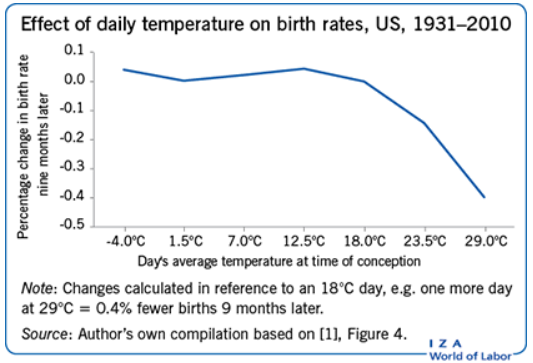[Taken from [Does hot weather affect human fertility?]]

The importance of temperature is self evident, and so it's important that we look at how some factors affect temperature. The factors we will be looking at are:
1. Rainfall
1. Relative humidity
1. Rain days
1. Sunshine duration

<a id='how_rain_cools'></a>As explained in [Gabriel Gerard Rooney et al., 2018](https://doi.org/10.5194/hess-22-6357-2018) rain droplets affects cooling of the surrounding air by evaporating into the unsaturated air. The air becomes more saturated (increase in humidity), as it rains and the temperature is cooled. It is worth noting that evaporation becomes harder as humidity rises which in turn implies that less cooling is taking place.

[Dorota.M and Stainislaw.W, 2014](https://doi.org/10.1002/joc.4238) found that:
> The present warming is influenced probably by the air-quality improvement (brightening
period) and an increase in sunshine duration in the years 1980–2012.

Later, [Dorota.M et al., 2022](https://doi.org/10.7163/GPol.0236) found that:
>The linear regression model confirmed that sunshine duration 
explains well the variability of, and increase in day-time air temperature in Poland in the warm part of the year.

It is important to note that the dataset used in the above studies is of western countries, where temperatures are usually lower than in Singapore. We will do a simple analysis to find if such phenomena are observable in Singapore.\
We expect, in addition to our main hypothesis, that there is an inverse relationship between temperature and amount of rainfall, relative humidity and number of rain days, and a direct relationship between temperature and sunshine duration.

[Does hot weather affect human fertility?]: https://wol.iza.org/articles/does-hot-weather-affect-human-fertility/long

### Coding Challenges

1. Manually calculate mean:

    Write a function that takes in values and returns the mean of the values. Create a list of numbers that you test on your function to check to make sure your function works!
    
    *Note*: Do not use any mean methods built-in to any Python libraries to do this! This should be done without importing any additional libraries.

In [1]:
# Code:
def mean(data_set):
    return sum(data_set)/len(data_set)

2. Manually calculate standard deviation:

    The formula for standard deviation is below:

    $$\sigma = \sqrt{\frac{1}{n}\sum_{i=1}^n(x_i - \mu)^2}$$

    Where $x_i$ represents each value in the dataset, $\mu$ represents the mean of all values in the dataset and $n$ represents the number of values in the dataset.

    Write a function that takes in values and returns the standard deviation of the values using the formula above. Hint: use the function you wrote above to calculate the mean! Use the list of numbers you created above to test on your function.
    
    *Note*: Do not use any standard deviation methods built-in to any Python libraries to do this! This should be done without importing any additional libraries. 

Note that $$
\frac{1}{n}\sum_{i=1}^n(x_i - \mu)^2 = \frac{1}{n}\sum_{i=1}^nx_i^2 - \mu^2.
$$
So $$
\sigma = \sqrt{\Biggl(\frac{1}{n}\sum_{i=1}^nx_i^2\ \Biggr) - \mu^2.} 
$$

In [2]:
# Code:
def standard_deviation(data_set):
    return (mean([data_point**2 for data_point in data_set])-mean(data_set)**2)**0.5

--- 
# Part 2

Part 2 requires knowledge of Pandas, EDA, data cleaning, and data visualization.

---

In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import scipy.stats as stats
sns.set()

## Data Import and Cleaning

In [4]:
#Import
births = pd.read_csv('../data/quarterly-live-births.csv').T
total_rain = pd.read_csv('../data/rainfall-monthly-total.csv')
days_rain = pd.read_csv('../data/rainfall-monthly-number-of-rain-days.csv')
humidity = pd.read_csv('../data/relative-humidity-monthly-mean.csv')
sunshine = pd.read_csv('../data/sunshine-duration-monthly-mean-daily-duration.csv')
temperature = pd.read_csv('../data/surface-air-temperature-monthly-mean.csv')

### 1. Display the data: print the first 5 rows of each dataframe to your Jupyter notebook.

In [5]:
births.head()

,0,1,2,3,4,5,6,7,8,9,...,22,23,24,25,26,27,28,29,30,31
Unnamed: 0,Theme: Population,Subject: Births and Fertility,"Topic: Births, Crude Birth Rate (CBR), Total F...","Table Title: Live-Births By Birth Order, Quart...",NaN,Data last updated: 09/11/2022,Source: REGISTRY OF BIRTHS AND DEATHS,NaN,NaN,Data Series,...,nes not elsewhere specified,- nil or negligible or not significant,Notes,Numbers may not add up to the totals due to ro...,Data are the latest available at the time of a...,Values are shown in Singapore dollars (unless ...,NaN,Generated by: SingStat Table Builder,Date generated: 11/02/2023,Contact: info@singstat.gov.sg
Unnamed: 1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2022 3Q,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Unnamed: 2,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2022 2Q,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Unnamed: 3,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2022 1Q,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Unnamed: 4,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2021 4Q,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [6]:
total_rain.head()

,month,total_rainfall
0,1982-01,107.1
1,1982-02,27.8
2,1982-03,160.8
3,1982-04,157.0
4,1982-05,102.2


In [7]:
days_rain.head()

,month,no_of_rainy_days
0,1982-01,10
1,1982-02,5
2,1982-03,11
3,1982-04,14
4,1982-05,10


In [8]:
humidity.head()

,month,mean_rh
0,1982-01,81.2
1,1982-02,79.5
2,1982-03,82.3
3,1982-04,85.9
4,1982-05,83.2


In [9]:
sunshine.head()

,month,mean_sunshine_hrs
0,1982-01,5.6
1,1982-02,7.6
2,1982-03,5.1
3,1982-04,4.7
4,1982-05,5.8


In [10]:
temperature.head()

,month,mean_temp
0,1982-01,25.9
1,1982-02,27.1
2,1982-03,27.2
3,1982-04,27.0
4,1982-05,28.0


### 2., 3. Check for missing values and datatype. Check for any obvious issues with the observations.

In [11]:
births.info()

<class 'pandas.core.frame.DataFrame'>
Index: 148 entries, Unnamed: 0 to Unnamed: 147
Data columns (total 32 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   0       1 non-null      object
 1   1       1 non-null      object
 2   2       1 non-null      object
 3   3       1 non-null      object
 4   4       0 non-null      object
 5   5       1 non-null      object
 6   6       1 non-null      object
 7   7       0 non-null      object
 8   8       1 non-null      object
 9   9       148 non-null    object
 10  10      148 non-null    object
 11  11      0 non-null      object
 12  12      1 non-null      object
 13  13      1 non-null      object
 14  14      0 non-null      object
 15  15      1 non-null      object
 16  16      1 non-null      object
 17  17      1 non-null      object
 18  18      0 non-null      object
 19  19      1 non-null      object
 20  20      1 non-null      object
 21  21      1 non-null      object
 22  22      1 non

In [12]:
total_rain.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 492 entries, 0 to 491
Data columns (total 2 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   month           492 non-null    object 
 1   total_rainfall  492 non-null    float64
dtypes: float64(1), object(1)
memory usage: 7.8+ KB


In [13]:
days_rain.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 492 entries, 0 to 491
Data columns (total 2 columns):
 #   Column            Non-Null Count  Dtype 
---  ------            --------------  ----- 
 0   month             492 non-null    object
 1   no_of_rainy_days  492 non-null    int64 
dtypes: int64(1), object(1)
memory usage: 7.8+ KB


In [14]:
humidity.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 492 entries, 0 to 491
Data columns (total 2 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   month    492 non-null    object 
 1   mean_rh  492 non-null    float64
dtypes: float64(1), object(1)
memory usage: 7.8+ KB


In [15]:
sunshine.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 492 entries, 0 to 491
Data columns (total 2 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   month              492 non-null    object 
 1   mean_sunshine_hrs  492 non-null    float64
dtypes: float64(1), object(1)
memory usage: 7.8+ KB


In [16]:
temperature.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 492 entries, 0 to 491
Data columns (total 2 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   month      492 non-null    object 
 1   mean_temp  492 non-null    float64
dtypes: float64(1), object(1)
memory usage: 7.8+ KB


### 4. Fix any errors you identified in steps 2-3.

Cleaning the only dataframe that had null-values shaping to be similar to other datasets.

In [17]:
births = (
    births
    .dropna(axis = 1)[1:]
    .rename(columns = {9: 'quarters', 10: 'births'})
    .iloc[::-1]
    .reset_index()
    .drop(columns='index')
)

Note that each row represents the quarter for some year.

In [18]:
births.head()

,quarters,births
0,1986 1Q,9954
1,1986 2Q,9353
2,1986 3Q,9854
3,1986 4Q,10239
4,1987 1Q,8834


In anticipation of the following quarterly mean calculations. The following line of code would return total number of days instead of the mean number of days.

In [19]:
days_rain['no_of_rainy_days'] = days_rain['no_of_rainy_days']*3

### 5. - 10.

Merging all but births, with the intention to sum up rows into quarters. The values of each row are in months right now, while those for births are in quaters.

In [20]:
temp_df = temperature.merge(total_rain).merge(humidity).merge(sunshine).merge(days_rain)

In [21]:
temp_df.head()

,month,mean_temp,total_rainfall,mean_rh,mean_sunshine_hrs,no_of_rainy_days
0,1982-01,25.9,107.1,81.2,5.6,30
1,1982-02,27.1,27.8,79.5,7.6,15
2,1982-03,27.2,160.8,82.3,5.1,33
3,1982-04,27.0,157.0,85.9,4.7,42
4,1982-05,28.0,102.2,83.2,5.8,30


A function to use .apply with.\
This function returns the mean of each quarter.

In [22]:
def sum_into_quarters(column):
    length = len(column)
    for i in range(length//3):
        column[i] = round(sum(column[3*i+0:3*i+3])/3,1)
    return column

**NOTE**: This way of obtaining mean (quarterly mean from monthly mean) from mean (monthly mean) is not strictly accurate, but in this case, since the divisors (number of days in a month) of monthly mean are close to the same, quarterly mean would not be too different from if we took the mean by considering individual days over the 3 months.

TL;DR, the quarterly mean we obtained here is just an approximation of the actual mean.

.iloc here ignores the first column (string object as of now, function not made to handle it), applying the function gives us the mean of each quarter, and finally the last .iloc removes the rest of the rows that are now redundant.

In [23]:
df = (temp_df
      .iloc[:,1:]
      .apply(sum_into_quarters)
      .iloc[:len(temp_df)//3]
)

In [24]:
df.head()

,mean_temp,total_rainfall,mean_rh,mean_sunshine_hrs,no_of_rainy_days
0,26.7,98.6,81.0,6.1,26
1,27.8,106.2,83.1,5.9,32
2,27.9,100.0,79.5,6.1,28
3,27.0,222.5,84.2,4.9,44
4,27.8,90.1,79.9,7.5,22


We now add the dates back in the format that we want (yyyy-q, e.g. 1998-Q3) so that we can apply .to_datetime. One way to do it is as follows. 

Another way could be to convert each year-month as an integer of the form yyyymm (e.g. 1982-01 -> 198201) and include the column in .apply above. This will work because for any given year because the last 2 digits will be either 06, 15, 24 or 33, which corresponds to Q1, Q2, Q3 and Q4. The rest of the numbers//3 will give the year. 

In [25]:
#create a list of years * 4, 1 for each quarter
list_of_years = sorted([i for i in range(1982,2023)]*4)
                       
#create set of quarters to match each year
list_of_quarters = np.tile(['-Q1','-Q2','-Q3','-Q4'], len(list_of_years))

#add date column back to df and remove the years 1982-1985 and 2022Q4 to match births
df['year'] = [str(date)+str(quarter) for date,quarter in zip(list_of_years,list_of_quarters)]

Since the dataset for births is shorter, we ignore the rows that births is missing.\
We would have to do .reset_index().drop() anyway so we might as well put the datetime column to the front of the dataset.

In [26]:
df = df[16:163].set_index('year').reset_index()

We are now ready to concatenate.

In [27]:
df = pd.concat(objs = [df,births], axis = 1).drop(columns = 'quarters')

In [28]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 147 entries, 0 to 146
Data columns (total 7 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   year               147 non-null    object 
 1   mean_temp          147 non-null    float64
 2   total_rainfall     147 non-null    float64
 3   mean_rh            147 non-null    float64
 4   mean_sunshine_hrs  147 non-null    float64
 5   no_of_rainy_days   147 non-null    int64  
 6   births             147 non-null    object 
dtypes: float64(4), int64(1), object(2)
memory usage: 8.2+ KB


Changing type of births to int and type of quarter to datetime.\
Renaming no_of_rainy_days and mean_sunshine_hrs column.

In [29]:
df['births'] = df['births'].astype('int64')
df['year'] = pd.to_datetime(df['year'])
df = df.rename(columns = {'no_of_rainy_days': 'rainy_days', 'mean_sunshine_hrs': 'mean_sunshine'})

In [30]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 147 entries, 0 to 146
Data columns (total 7 columns):
 #   Column          Non-Null Count  Dtype         
---  ------          --------------  -----         
 0   year            147 non-null    datetime64[ns]
 1   mean_temp       147 non-null    float64       
 2   total_rainfall  147 non-null    float64       
 3   mean_rh         147 non-null    float64       
 4   mean_sunshine   147 non-null    float64       
 5   rainy_days      147 non-null    int64         
 6   births          147 non-null    int64         
dtypes: datetime64[ns](1), float64(4), int64(2)
memory usage: 8.2 KB


In [31]:
df.to_csv('../data/quarterly-climate-data-and-births.csv', index = False)

## Data dictionary
|Feature|Type|Dataset|Description|
|---|---|---|---|
|year|datetime|quarterly-live-births|Year in quarters denoted as yyyy-mm-dd, where mm is the first month of the quarter and dd is 01|
|mean_temp|float|surface-air-temperature-monthly-mean|Quarterly mean of temperature|
|total_rainfall|float|rainfall-monthly-total|Quarterly mean of total_rainfall. Total rainfall in mm|
|mean_rh|float|relative-humidity-monthly-mean|Quarterly mean of relative humidity|
|mean_sunshine|float|sunshine-duration-monthly-mean-daily-duration|Quarterly mean of daily sunshine duration|
|rainy_days|int|rainfall-monthly-number-of-rain-days|Total number of days it rained in quarter|
|births|int|quarterly-live-births|Total births in quarter|


Back to [content page](#Contents:).

## Exploratory Data Analysis

### 1. Summary Statistics.

In [32]:
df.describe()

,mean_temp,total_rainfall,mean_rh,mean_sunshine,rainy_days,births
count,147.000000,147.000000,147.000000,147.000000,147.000000,147.000000
mean,27.729932,178.755102,82.155782,5.702041,42.374150,10686.911565
std,0.658809,70.233579,2.990879,0.871267,10.458143,1340.973184
min,26.300000,15.600000,73.400000,3.600000,12.000000,8551.000000
25%,27.200000,132.850000,80.300000,5.150000,37.000000,9699.500000
50%,27.700000,168.400000,82.800000,5.700000,44.000000,10326.000000
75%,28.200000,230.350000,84.400000,6.200000,49.000000,11471.000000
max,29.100000,403.400000,87.900000,8.200000,65.000000,15827.000000


### 2. Dictionary comprehension

The answer from .describe() will be different, since std used in .describe() is the sample std, while the one we found above is the population std.

In [33]:
sd = {feature: round(standard_deviation(df[feature]),4) for feature in df.columns[1:]}
sd

{'mean_temp': 0.6566,
 'total_rainfall': 69.9943,
 'mean_rh': 2.9807,
 'mean_sunshine': 0.8683,
 'rainy_days': 10.4225,
 'births': 1336.4043}

### 3. Investigate trends in the data

#### 3.1. Which month have the highest and lowest feature in 1990, 2000, 2010 and 2020?

My answer will be in terms of quarters, since that's how my dataset is structured.

In [34]:
#This function returns the quarter which has the highest and lowest feature in any given year. 
def max_min_feature(year, feature):
    year = str(year)
    feature = str(feature)
    dictionary = {
        'mean_temp': 'temperature',
        'total_rainfall': 'rainfall',
        'mean_rh': 'relative humidity',
        'mean_sunshine': 'sunshine',
        'rainy_days': 'number of rainy days',
        'births': 'births'
    }
    dic_quarter = {
        '01': 'Q1',
        '04': 'Q2',
        '07': 'Q3',
        '10': 'Q4'
    }
    # returns a list of all the years in df
    df_quarter_year = df['year'].dt.strftime('%Y')
    
    # returns the max and min rainfall for the chosen year
    ls = {
        'highest': df[(df_quarter_year == year)][feature].max(),
        'lowest': df[(df_quarter_year == year)][feature].min()
    }
    
    # prints the quarter based on max or min rainfall
    for min_max in ls:
        for index in df[(df_quarter_year == year)&(df[feature]==ls[min_max])]['year'].index:
            print('The quarter with the {} {}, {}, in {} is in {}'.format(min_max, dictionary[feature], ls[min_max], year, dic_quarter[df[(df_quarter_year == year)&(df[feature]==ls[min_max])]['year'].dt.strftime("%m")[index]]))

In [35]:
years = ['1990', '2000', '2010', '2020']
for feature in df.columns[1:]:
    for year in years:
        max_min_feature(year, feature)
        print('\n')

The quarter with the highest temperature, 28.5, in 1990 is in Q2
The quarter with the lowest temperature, 27.0, in 1990 is in Q4


The quarter with the highest temperature, 27.9, in 2000 is in Q2
The quarter with the highest temperature, 27.9, in 2000 is in Q3
The quarter with the lowest temperature, 26.7, in 2000 is in Q1


The quarter with the highest temperature, 28.7, in 2010 is in Q2
The quarter with the lowest temperature, 27.5, in 2010 is in Q4


The quarter with the highest temperature, 28.6, in 2020 is in Q2
The quarter with the lowest temperature, 27.6, in 2020 is in Q4


The quarter with the highest rainfall, 158.4, in 1990 is in Q3
The quarter with the lowest rainfall, 88.6, in 1990 is in Q1


The quarter with the highest rainfall, 250.4, in 2000 is in Q1
The quarter with the lowest rainfall, 103.6, in 2000 is in Q3


The quarter with the highest rainfall, 208.8, in 2010 is in Q4
The quarter with the lowest rainfall, 104.6, in 2010 is in Q1


The quarter with the highest ra

#### 3.2. Which year have the highest and lowest total rainfall in the date range of analysis?

In [36]:
for i in df[df['total_rainfall']==df['total_rainfall'].max()]['year'].dt.strftime('%Y').index:
    print(f"Max rainfall is in year {df[df['total_rainfall']==df['total_rainfall'].max()]['year'].dt.strftime('%Y')[i]}")
for i in df[df['total_rainfall']==df['total_rainfall'].min()]['year'].dt.strftime('%Y').index:
    print(f"Min rainfall is in year {df[df['total_rainfall']==df['total_rainfall'].min()]['year'].dt.strftime('%Y')[i]}")

Max rainfall is in year 1992
Min rainfall is in year 2019


#### 3.3. Which month have the highest and lowest number of rainy days in 1990, 2000, 2010 and 2020? 

See [3.1.](#3.1.-Which-month-have-the-highest-and-lowest-feature-in-1990,-2000,-2010-and-2020?)

#### 3.4. Which year have the highest and lowest number of rainy days in the date range of analysis?

In [37]:
for i in df[df['rainy_days']==df['rainy_days'].max()]['year'].dt.strftime('%Y').index:
    print(f"Max number of rainy days is in year {df[df['rainy_days']==df['rainy_days'].max()]['year'].dt.strftime('%Y')[i]}")
for i in df[df['rainy_days']==df['rainy_days'].min()]['year'].dt.strftime('%Y').index:
    print(f"Min number of rainy days is in year {df[df['rainy_days']==df['rainy_days'].min()]['year'].dt.strftime('%Y')[i]}")

Max number of rainy days is in year 2011
Max number of rainy days is in year 2017
Min number of rainy days is in year 2014


#### 3.5. Are there any outliers months in the dataset?

See [here](#3.-Plot-and-interpret-boxplots.).

In [38]:
df.kurtosis(numeric_only=True)

mean_temp        -0.776786
total_rainfall    0.114949
mean_rh           0.064352
mean_sunshine     0.188847
rainy_days        0.203385
births            0.979612
dtype: float64

In [39]:
df.skew(numeric_only=True)

mean_temp        -0.004035
total_rainfall    0.364911
mean_rh          -0.752720
mean_sunshine     0.205636
rainy_days       -0.457788
births            1.033064
dtype: float64

### Summary
#### Min/max rainfall & raindays

|Highest|1990|2000|2010|2020|
|---|---|---|---|---|
|Temperature|Q2|Q2, Q3|Q2|Q2|
|Total rainfall|Q3|Q1|Q4|Q2|
|Relative humidity|Q4|Q1|Q4|Q4|
|Sunshine|Q1|Q3|Q1|Q1|
|No. of days rained|Q3|Q3|Q2|Q3|
|Births|Q4|Q4|Q3|Q3|

|Lowest|1990|2000|2010|2020|
|---|---|---|---|---|
|Temperature|Q4|Q1|Q4|Q4|
|Total rainfall|Q1|Q3|Q1|Q1|
|Relative humidity|Q1|Q3|Q1|Q1|
|Sunshine|Q4|Q4|Q4|Q4|
|No. of days rained|Q1|Q3|Q1|Q1|
|Births|Q1|Q1|Q1|Q1|

The 2 tables above show the quarter in which the highest/lowest rainfall/no of days rained occurs for the given years.

||Total rainfall|No. of days rained|
|---|---|---|
|Highest|1992|2011, 2017|
|Lowest|2019|2014|

Table show year where highest/lowest rainfall/no of days rained occured.

#### Outliers
There are some statistical outliers for the categories of total rainfall, relative humidity, sunshine hours, number of rain days and births.

#### Skew, Kurtosis
||mean_temp|total_rainfall|mean_rh|mean_sunshine|rainy_days|births|
|---|---|---|---|---|---|---|
|skew|-0.004035|0.364911|-0.752720|0.205636|-0.457788|1.033064|
|kurtosis|-0.776786|0.114949|0.064352|0.188847|0.203385|0.979612|
[Back](#Describing-the-distributions)

#### Focusing on the main point of our analysis: Temperature vs births
We hypothesized an inverse relationship between temperature and births. We put forward evidence supporting our hypothesis. In our table, we add 9months (3Qs) to the temperature, to see the effects of temperature on birth, which is approximately 9-10months later.

||1990|2000|2010|2020|
|---|---|---|---|---|
|Highest temperature (Adjusted)|Q1|Q1, Q2|Q1|Q1|
|Lowest births|Q1|Q1|Q1|Q1|
|Lowest temperature (Adjusted)|Q3|Q4|Q3|Q3|
|Highest births|Q4|Q4|Q3|Q3|

Notice that the dates matches well with our hypothesis.

Back to [content page](#Contents:).

## Visualize the Data


### 1. Use Seaborn's heatmap with pandas .corr() to visualize correlations between all numeric features.

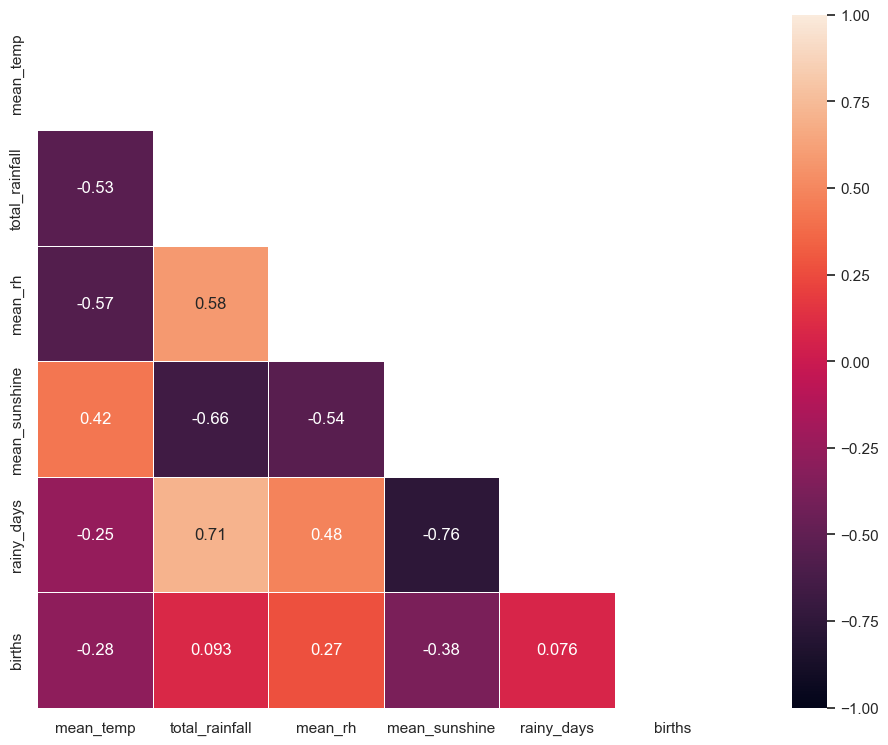

In [40]:
corr = df.corr()
#creates an array of the same shape as corr, in anticipation for the next step.
mask = np.zeros_like(corr)
#np.triu_index_from() gives the upper triangular indices of the rows and columns in two arrays, 
#in terms of how we usually read matrices. True will set all those values to 1.
mask[np.triu_indices_from(mask)] = True

plt.figure(figsize=(16,9))
with sns.axes_style("white"):
    #mask will ignore all values for which mask(i,j) = 1
    sns.heatmap(corr, mask = mask, square = True, annot = True, vmin = -1, vmax = 1, linewidths = .5)

As [expected](#Outside-Research), in the first column, we see the relationship each feature has relative to temperature is what we hypothesized.

An interesting point to note would be that while the temperature column is as expected, the birth columns seem to imply that although rainfall and number of raining days affect temperature, they may not have any correlation to the number of births.

<a id='future_work'></a>Assuming that there indeed is no relation between births and rain, it could be that temperature is just a mask for what really affects birthrate, since temperature is affected by everything else. This could make for a good future work.

For the other 6 boxes, their relationship is obvious and there does not seem to be anything interesting going on.

### 2. Visualize distributions using histograms. If you have a lot, consider writing a custom function and use subplots.

In [41]:
#Function shamelessly stolen from our instructor, Ryan.
def subplot_histograms(dataframe, list_of_columns, list_of_titles, list_of_xlabels):
    nrows = int(np.ceil(len(list_of_columns)/2)) # Makes sure you have enough rows
    fig, ax = plt.subplots(nrows=nrows, ncols=2, sharex=False, sharey=True, squeeze=True, figsize=(20,20)) # You'll want to specify your figsize
    ax = ax.ravel() # Ravel turns a matrix into a vector, which is easier to iterate
    for i, column in enumerate(list_of_columns): # Gives us an index value to get into all our lists
        ax[i].hist(dataframe[column])
        ax[i].set_title(f'Histogram of {column}, with it\'s mean and median')# feel free to add more settings
        ax[i].set_xlabel(list_of_xlabels[i])# Set titles, labels, etc here for each subplot
        ax[i].axvline(dataframe[column].median(), color='r', linestyle='dashed', linewidth=3, label='median')
        ax[i].axvline(dataframe[column].mean(), color='k', linestyle='dashed', linewidth=3, label = 'mean')
        ax[i].legend()

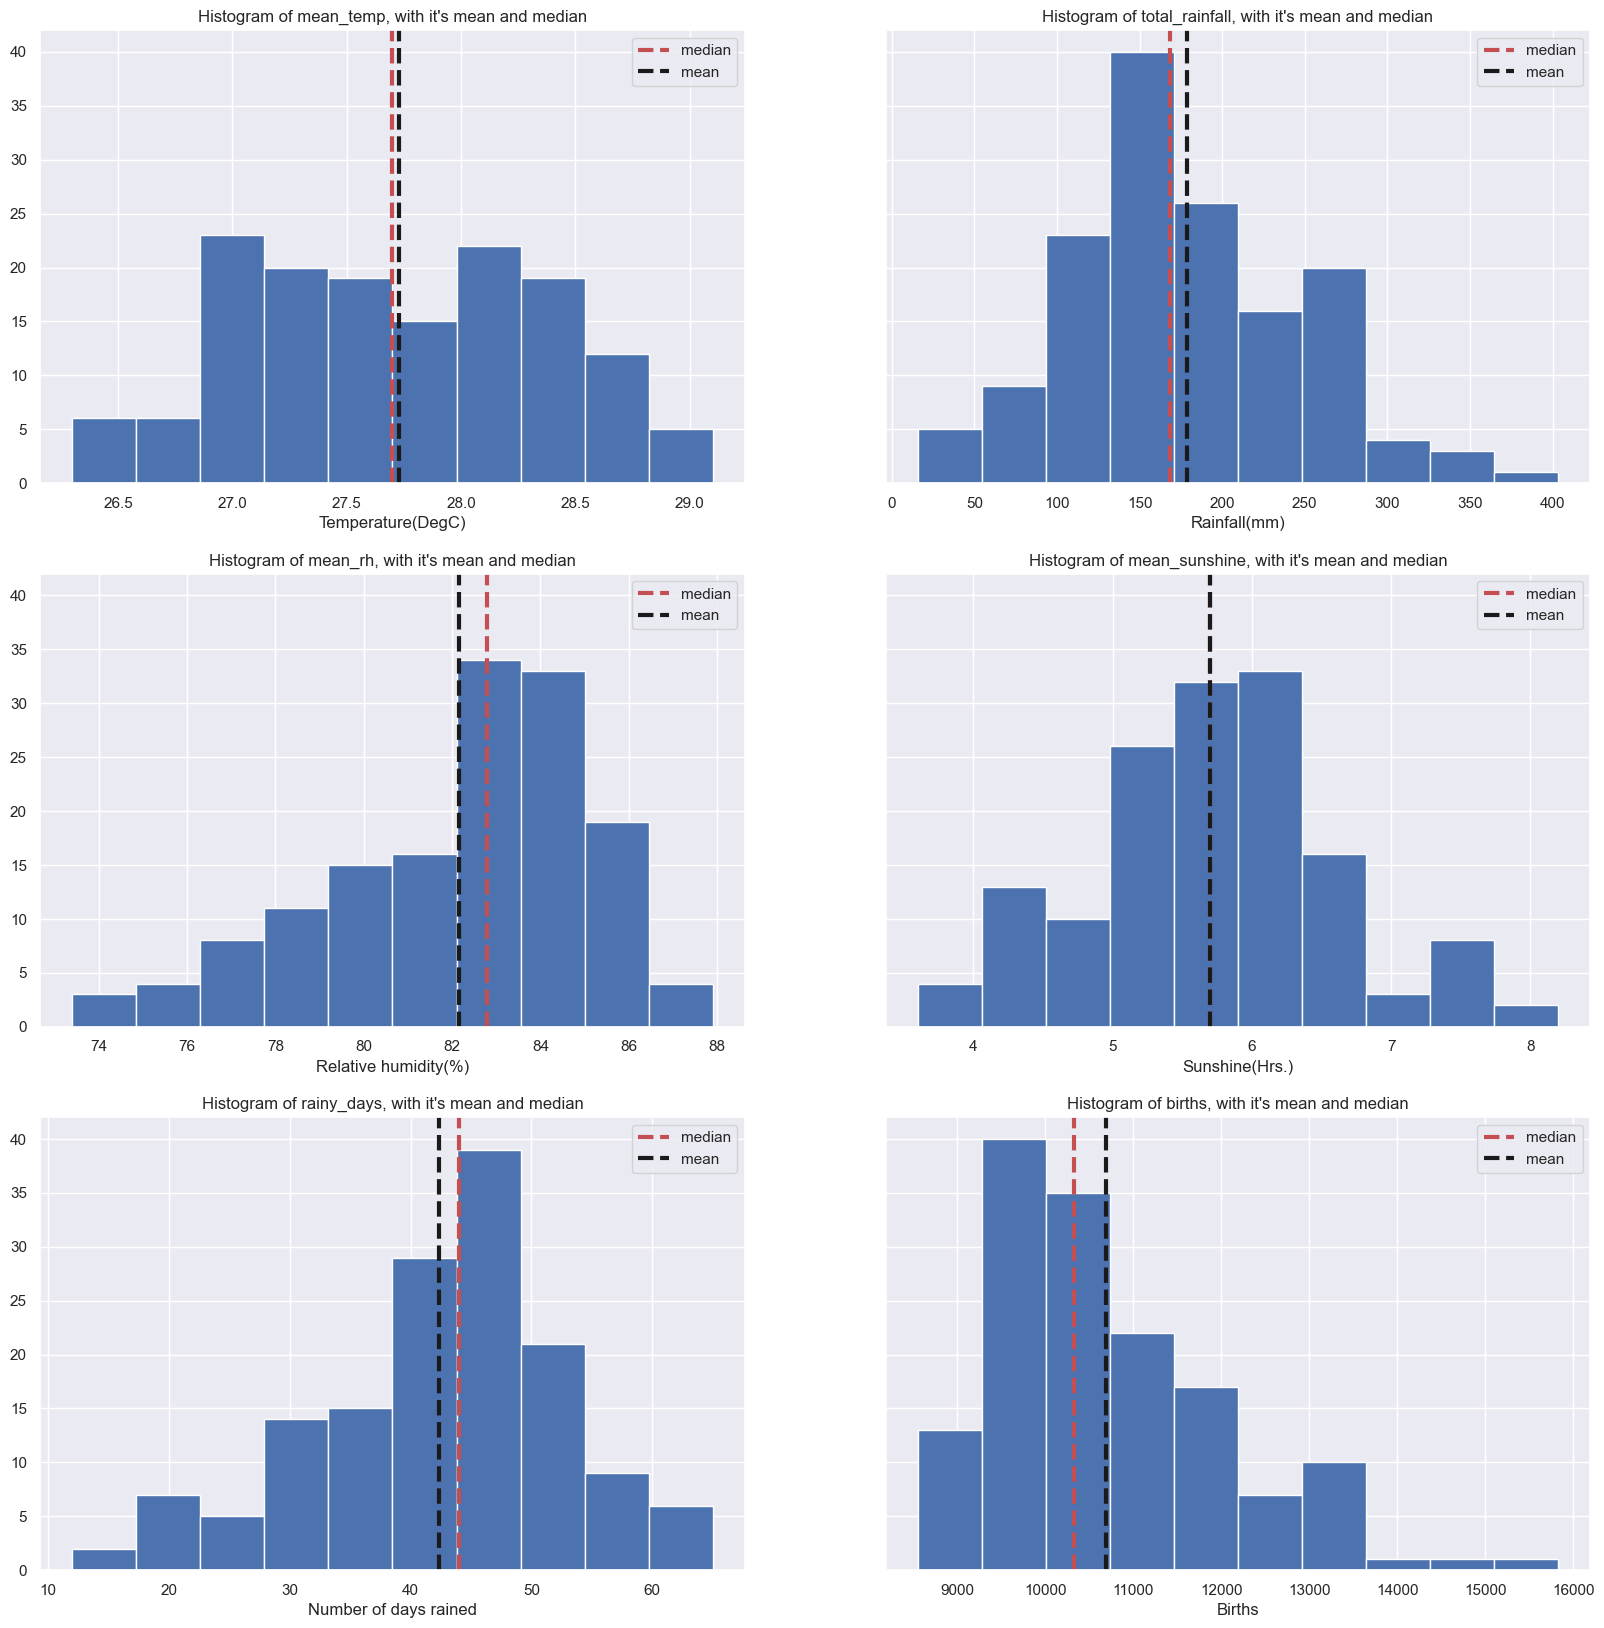

In [42]:
subplot_histograms(df, df.columns[1:], df.columns[1:], ['Temperature(DegC)', 'Rainfall(mm)', 'Relative humidity(%)', 'Sunshine(Hrs.)', 'Number of days rained', 'Births'])

### Describing the distributions

In [43]:
df.describe()

,mean_temp,total_rainfall,mean_rh,mean_sunshine,rainy_days,births
count,147.000000,147.000000,147.000000,147.000000,147.000000,147.000000
mean,27.729932,178.755102,82.155782,5.702041,42.374150,10686.911565
std,0.658809,70.233579,2.990879,0.871267,10.458143,1340.973184
min,26.300000,15.600000,73.400000,3.600000,12.000000,8551.000000
25%,27.200000,132.850000,80.300000,5.150000,37.000000,9699.500000
50%,27.700000,168.400000,82.800000,5.700000,44.000000,10326.000000
75%,28.200000,230.350000,84.400000,6.200000,49.000000,11471.000000
max,29.100000,403.400000,87.900000,8.200000,65.000000,15827.000000


The summary statistics can be found in the cell above.\
You can find Skew and Kurtosis [here](#Skew,-Kurtosis).

- **Temperature**\
    The values seem to be more uniformly distributed with little skew. It has relatively fat tails, another trait of a uniform distribution.
    Mean is about 27.8 degree celsius. This feature is likely not normally distributed since kurtosis is far from 0.
    
    
- **Rainfall**\
    The values are centered around around the mean with some outliers on the right. Kurtosis and skew are not too far from 0, suggesting that rainfall could be assumed to be normal.
    
    
- **Relative humidity**\
    Relative humidity has an obvious right skew as expected in hot and humid Singapore. It also has low standard deviation, about 2-3% of the mean.
    
    
- **Sunshine hours**\
    The sunshine hours mean and median are close to being the same, the distribution is almost symmetric, with skew and kurtosis close to 0. It would be safe to assume it's normally distributed.
    
 
We may continue to assume normality due to the central limit theorem, as long as our sample size is large enough. (Typically n >=30)\
In the next cell, the Shapiro-Wilk test for normality corroborates our findings.  

In [44]:
for feature in df.columns[1:]:
    if stats.shapiro(df[feature])[1] > 0.05:
        print(f'Shapiro test result for {feature} is :')
        print(f'{stats.shapiro(df[feature])}\n')

Shapiro test result for total_rainfall is :
ShapiroResult(statistic=0.9870389103889465, pvalue=0.1863994300365448)

Shapiro test result for mean_sunshine is :
ShapiroResult(statistic=0.987165629863739, pvalue=0.19242630898952484)



### 3. Plot and interpret boxplots.

In [45]:
def box_plot(df_columns,ylabels, year_start = '2010', year_end = '2022'):
    years = df['year'].dt.strftime('%Y')
    for i, column in enumerate(df_columns):
        plt.figure(figsize = (6,5))
        sns.boxplot(data=df, x =years[(years >= year_start)&(years <= (year_end))], y = column);
        plt.ylabel(ylabels[i])
        plt.xticks(rotation=90)
        

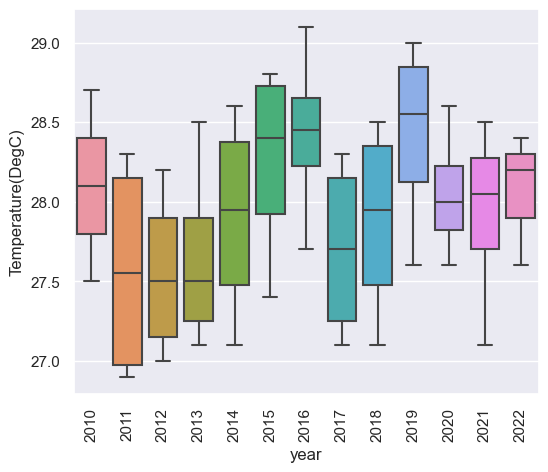

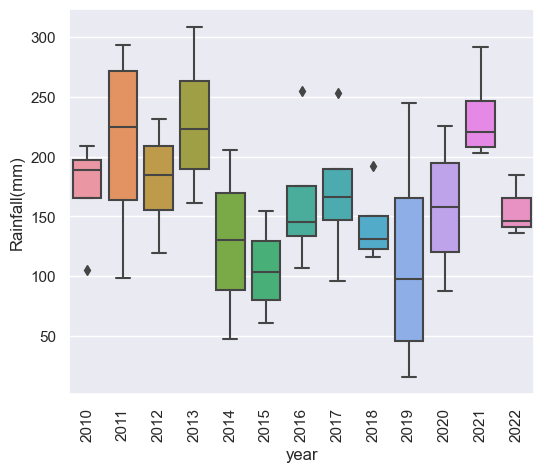

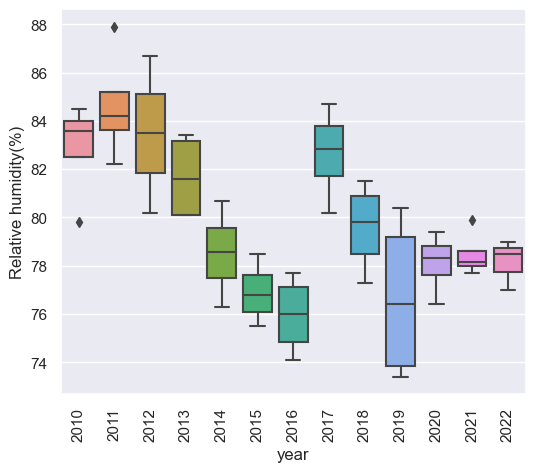

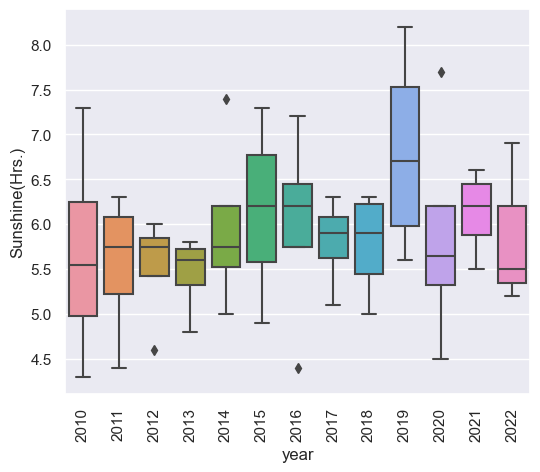

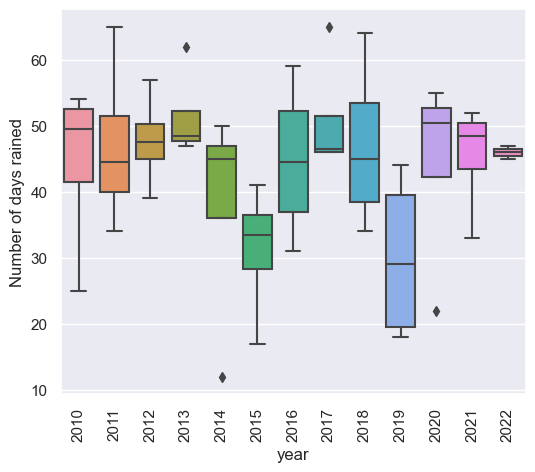

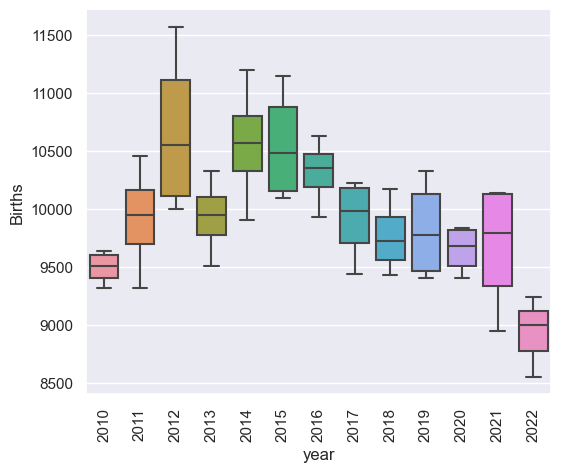

In [46]:
box_plot(df.columns[1:],['Temperature(DegC)', 'Rainfall(mm)', 'Relative humidity(%)', 'Sunshine(Hrs.)', 'Number of days rained', 'Births'])

The mean temperature from the years 2010 to 2022 has been relatively stable at between 27.5 and 28.5 degree celsius. The temperature in 2016 is very concentrated around the mean, and it is also close to symmetric since the mean is almost in the middle of the IQR. It does not display any significant skew.\
The total rainfall in 2018 shows a weird looking boxplot. This occurs since we only have 4 datapoints for each year, corresponding to the number of quarters in a year. This means that the highest rainfall in the year 2018 corresponds to being a statistical outlier, represented by the diamond.


### 4. Plot and interpret scatter plots to view relationships between features. Feel free to write a custom function, and subplot if you'd like. Functions save both time and space.

In [47]:
#Again, shamelessly EDITED from the stolen function above.
def subplot_scatter(dataframe, list_of_scatter, ylabels): #list of scatter can be a list of lists with 2 objects or a list of tuples with 2 objects.
    nrows = int(np.ceil(len(list_of_scatter)/2)) # Makes sure you have enough rows
    fig, ax = plt.subplots(nrows=nrows, ncols=2, sharex=False, sharey=False, squeeze=True, figsize=(20,20)) # You'll want to specify your figsize
    ax = ax.ravel() # Ravel turns a matrix into a vector, which is easier to iterate
    for i, tup in enumerate(list_of_scatter): # Gives us an index value to get into all our lists
        a,b = np.polyfit(dataframe[tup[0]],dataframe[tup[1]],1)
        ax[i].scatter(dataframe[tup[0]], dataframe[tup[1]]);
        ax[i].plot(dataframe[tup[0]], a*dataframe[tup[0]]+b, color='red')
#         ax[i].set_title(list_of_titles[i])# feel free to add more settings
        ax[i].set_xlabel('Temperature', fontsize = 20)# Set titles, labels, etc here for each subplot
        ax[i].set_ylabel(ylabels[i], fontsize = 20)

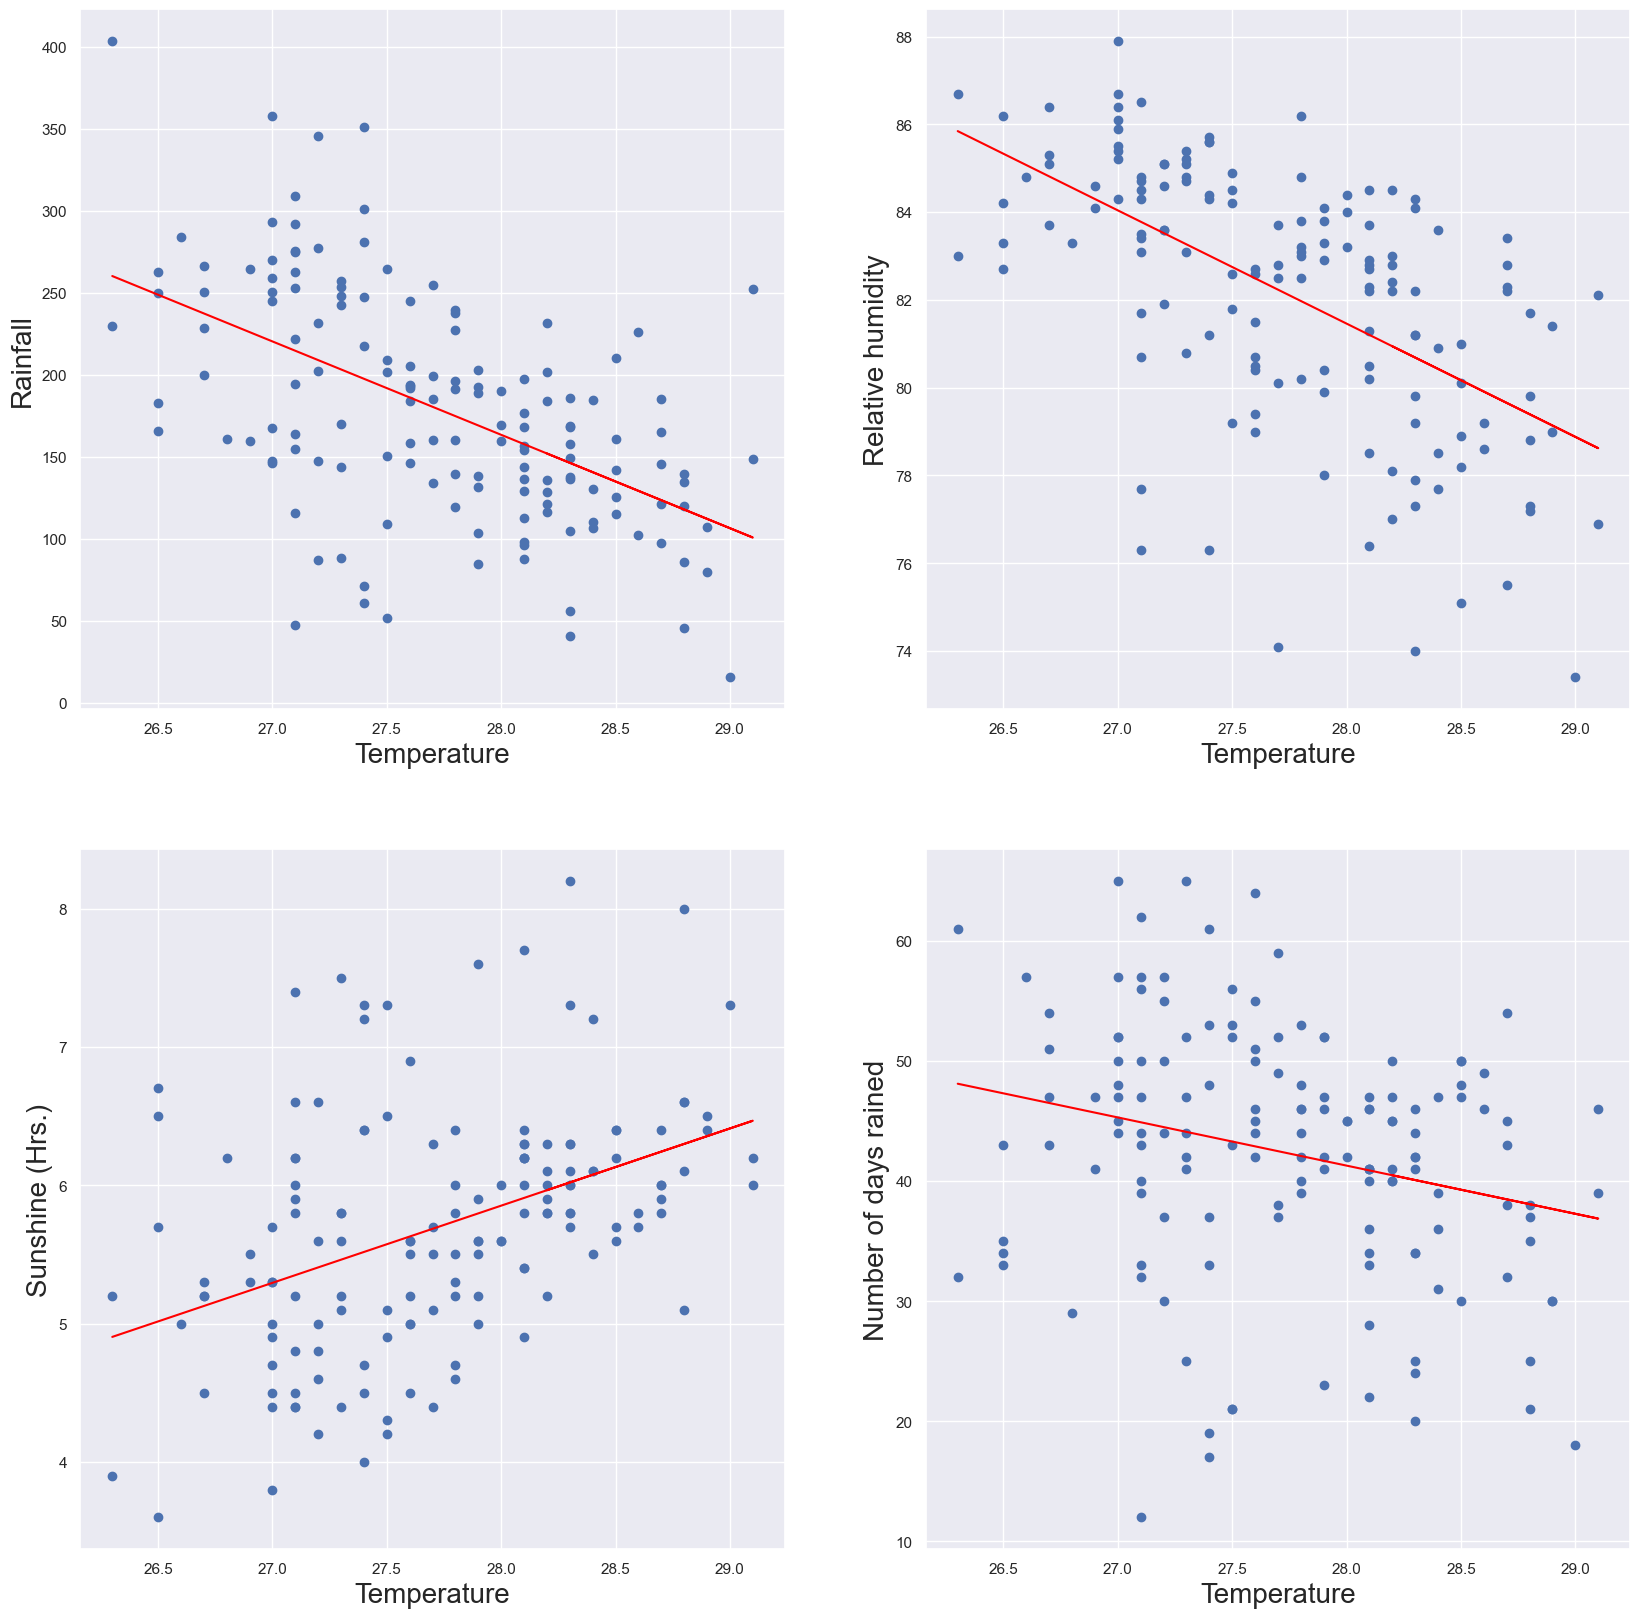

In [48]:
list_of_scatter = [('mean_temp', feature) for feature in df.columns[2:-1]]
subplot_scatter(df, list_of_scatter, ['Rainfall', 'Relative humidity', 'Sunshine (Hrs.)', 'Number of days rained'])

The 4 scatter plots are plotted with a best fit line in red. The datapoints looks sparse and does not seem to have any obvious correlation. The best fit line however does obviously show either a direct or inverse relationship between temperature and the opposing feature.

### 5. Additional plots of your choosing.

In [49]:
new_df = df.groupby(df['year'].dt.strftime('%m')).mean().reset_index()
new_df['year'] = ['Q1', 'Q2', 'Q3', 'Q4']
#Cyclic permutation by 3 quarters
new_df['mean_temp_adjusted'] = [new_df['mean_temp'][1], new_df['mean_temp'][2],new_df['mean_temp'][3],new_df['mean_temp'][0]] 

<a id='evidence'></a>

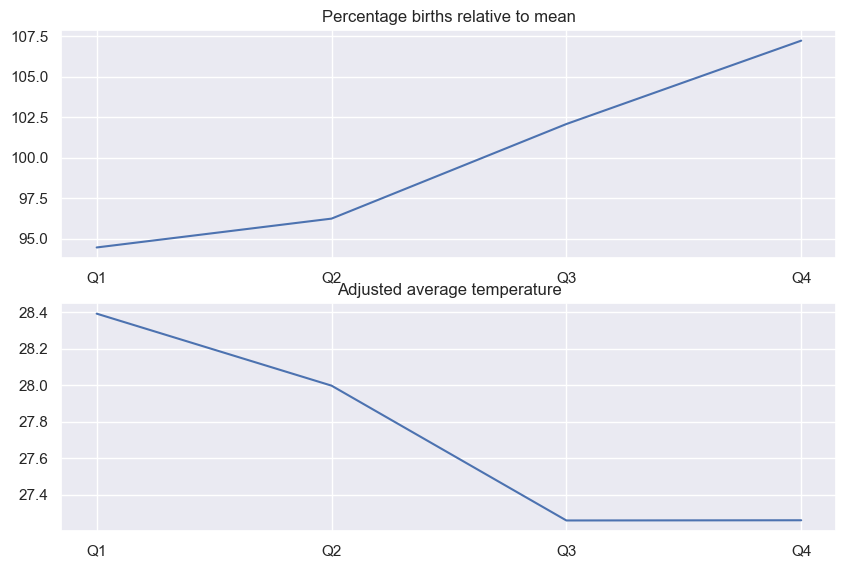

In [50]:
plt.figure(figsize = (10, 6.5))

ax1 = plt.subplot(2,1,1)
ax1.set_title('Percentage births relative to mean')
ax1.plot(new_df['year'],
        new_df['births']*100/new_df.births.mean()
        )

ax2 = plt.subplot(2,1,2)
ax2.set_title('Adjusted average temperature')
ax2.plot(new_df['year'],
        new_df['mean_temp_adjusted']
        );


Here we have plotted the temperature graph as per the [table](#Focusing-on-the-main-point-of-our-analysis:-Temperature-vs-Sexual-activity) found above, by shifting cyclically by 3 quarters so that the dates for temperature now represents the temperature 9 months ago. We can see clearly now that the hottest quarter causes the birth rate to be the lowest (a reduction of almost 6% from average) 9 months later, and increases as the weather turns cooler. 

In [51]:
def line_plot(data, df_columns, ylabels, year_start = '2010', year_end = '2022'):
    years = df['year'].dt.strftime('%Y')
    for i, column in enumerate(df_columns):
        plt.figure(figsize = (10,3))
        sns.lineplot(data=data, x =years[(years >= year_start)&(years <= (year_end))], y = column)
        plt.ylabel(ylabels[i])
        if int(year_start) <= 2002:
            plt.xticks(rotation=90)
        if int(year_start) >= 2010 and int(year_start) <= 2012:
            plt.axvline(x='2013', color="r")

<a id='by_year'></a>

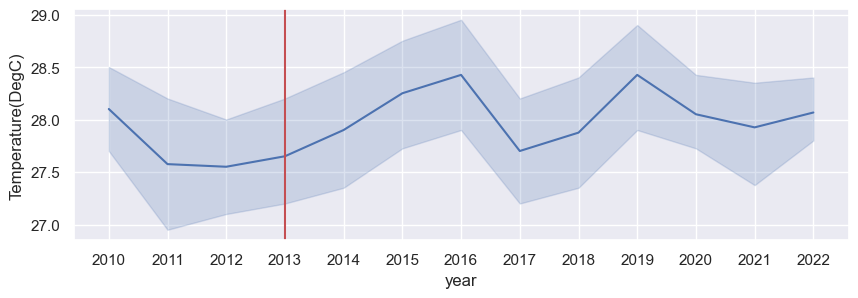

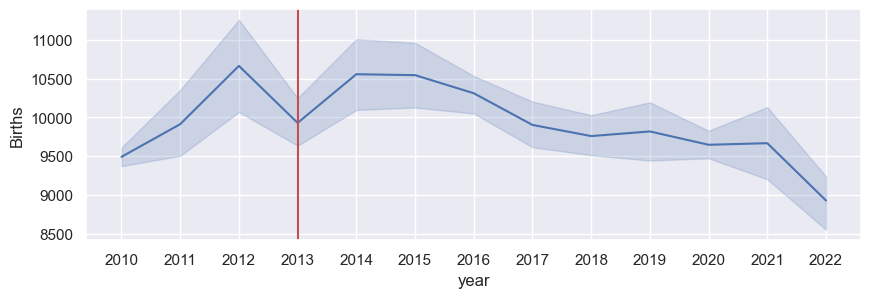

In [52]:
line_plot(df, ['mean_temp','births'], ['Temperature(DegC)', 'Births'])

From the years 2010 to 2013, we see that the relationship between temperature and births still holds, but after 2013, regardless of temperature changes, the birth rate seems to be declining. 

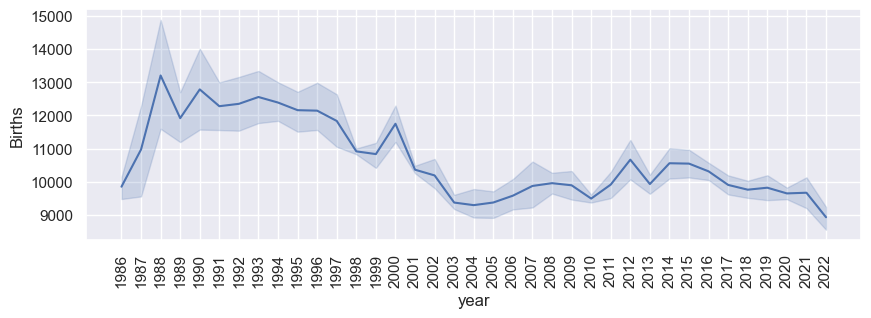

In [53]:
line_plot(df, ['births'], ['Births'], year_start = '1986')

In fact, from 1988 onward, the number of births seem to be on a downward trend.

<a id='heatmap'></a>

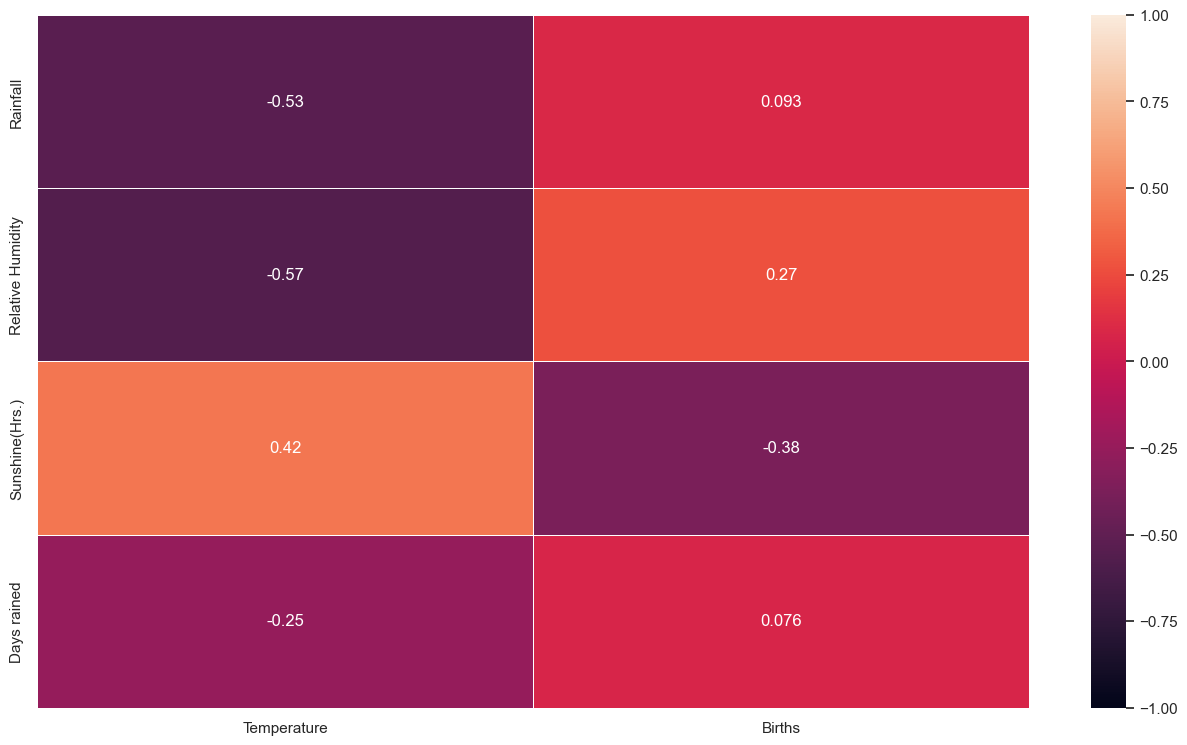

In [57]:
corr_2 = df.corr()[['mean_temp','births']].iloc[1:-1]

plt.figure(figsize=(16,9))
with sns.axes_style("white"):
    #mask will ignore all values for which mask(i,j) = 1
    sns.heatmap(corr_2, annot = True, vmin = -1, vmax = 1, linewidths = .5, xticklabels=['Temperature','Births'], yticklabels=['Rainfall', 'Relative Humidity', 'Sunshine(Hrs.)', 'Days rained'])


## Conclusions and Recommendations

### Main results
We have indeed gathered some [evidence](#evidence) that temperature is related inversely to the number of births. **Based on the data we have**, however, it is not clear how much of the changes in birth rate is due to a change in temperature. 

Take for instance as shown in the [graph](#graph) by Barreca, the % change in birth is relatively stable up to 18 degrees and sees a large fall after, up to 0.4% change at 29 degrees. That is a daily reduction of 0.4% **per day** of temperatures being at 29 degrees.

Our data on the number of births is at a comparatively coarse resolution and while we are able to see the % change in number of births due to a change in temperature, it is hard to argue that the change is not due to some other factor.

Indeed, if we were to look at the [graph](#by_year) by years, we notice that regardless of the temperature changes after 2013, the number of births is on a general downward trend. According to [CNN](https://www.channelnewsasia.com/singapore/singapore-population-increase-two-year-decline-marriages-birth-rate-2968081#:~:text=rising%20proportion%20,fewer%20children), "rising proportion of singles, later marriages, and married couples having fewer children" are the reasons for the declining birth rate.

Do note that all we are claiming is that just comparing temperature with number of births, especially at such a coarse resolution, does not tell us the full story.

It is also worth noting that there have been [studies](https://doi.org/10.1007/s12522-011-0105-6) on mammals showing that heat stress harms reproduction. An aspect which is negatively affected is follicular development in female cows. How much of it applies to the population in Singapore remains a topic requiring more research.

What is clear, however, is that temperature has an inverse relationship with the birth rate. Policies allowing an increased chance of exposure to reproduction activities during the colder quarters of the year could help, in the long run, improve the ageing population situation.

### Future work
Collecting more detailed datasets relating to births (up to days) and logs/diaries/journals of sexual activity.


As mentioned [here](#future_work), we have seen that rainfall, relative humidity and sunlight hours affect temperature as we [expected](#how_rain_cools), and since birth rate is related to temperature, we should expect some correlation between birth, relative humidity, sunlight and rainfall as well. However, it seems that rainfall has [no linear correlation](#heatmap) to birth rate, which suggests that temperature could just be a trojan horse for one or some of the other factors.